# Classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
styleSilentShot = pd.read_excel('1.2 SilentSoundScale_asl_count30+.xlsx')
x = styleSilentShot.iloc[: , 1:-1].values # These are the predictor, independent variables (the 1:-1 excludes the first and last columns)
y = styleSilentShot.iloc[: , -1].values # These are the target variables (or classes, in this case)

In [ ]:
print(x[0,:])

['USA' 6.7 58 4.0 2.0 64.0 224 82 37 36 53 3]


In [ ]:
styleSilentShot.head()

,Title,COUNTRY,ASL,RA,POV,INS,BCU,CU,MCU,MS,MLS,LS,VLS,Sound
0,10 Things I Hate About You,USA,6.7,58,4.0,2.0,64.0,224,82,37,36,53,3,1
1,"Adventures of Robin Hood, The",USA,5.0,0,0.0,0.0,3.0,53,71,77,109,111,76,1
2,"Affairs of Anatole, The",USA,8.0,23,16.0,9.0,33.0,26,89,141,136,70,5,0
3,Alley Cat,BRI,6.0,10,0.0,0.0,17.0,68,84,82,101,142,5,0
4,"Almost Perfect Affair, An",USA,4.2,64,12.0,7.0,70.0,199,93,51,26,51,9,1


## Taking care of missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[: , 1:]) # Only the columns containing the numerical values
x[: , 1:] = imputer.transform(x[: , 1:]) # Update the variable x

## Encoding the independent variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
# Print whole matrices 
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
# print(x_test)

In [ ]:
# print(y_test)

# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Train Model and Predict
k = 5  
classifierKNN = KNeighborsClassifier(n_neighbors=k)
classifierKNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifierKNN.predict(x_test)
np.set_printoptions(precision=2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

[[16 19]
 [ 9 69]]
Accuracy: 0.7522123893805309
Precision: 0.7840909090909091
Recall: 0.8846153846153846


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierKNN, X = x_train, y = y_train, cv = 10) # 10-fold cross validation = 10 different test sets
print("kNN cross-validation")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # Format: float with two decimals
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))

kNN cross-validation
Accuracy: 77.99 %
Standard deviation: 5.40 %


## Find optimal value for K using error rates and accuracy

Compare the error rates at different values of K

Minimum error:- 0.18584070796460178 at K = 13


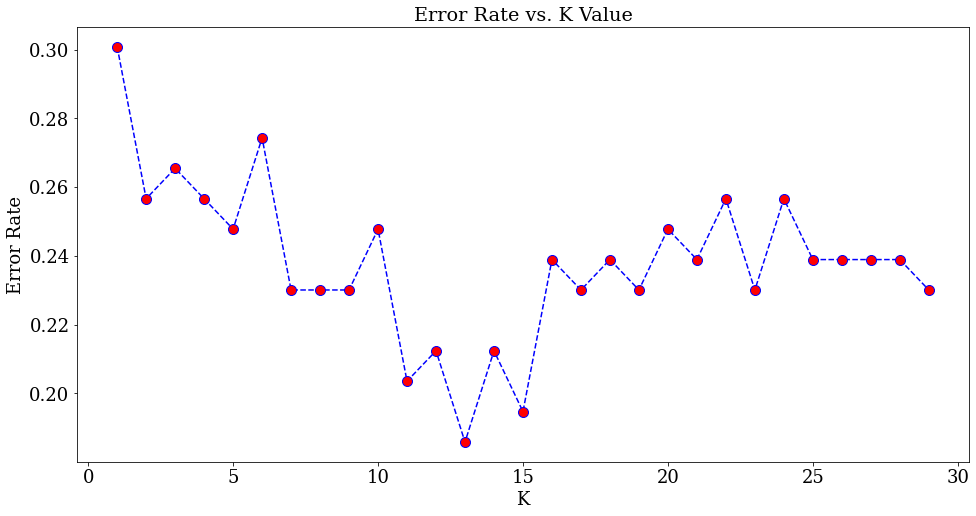

In [ ]:
error_rate = []
for i in range(1,30): # 30 is chosen as the maximum number of K as the
                      # training data comprises 264 instances, the square root of which is 16
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(16,8))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 16})

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",1+error_rate.index(min(error_rate)))

Compare the accuracy rates at different values of K

Maximum accuracy:- 0.8141592920353983 at K = 13


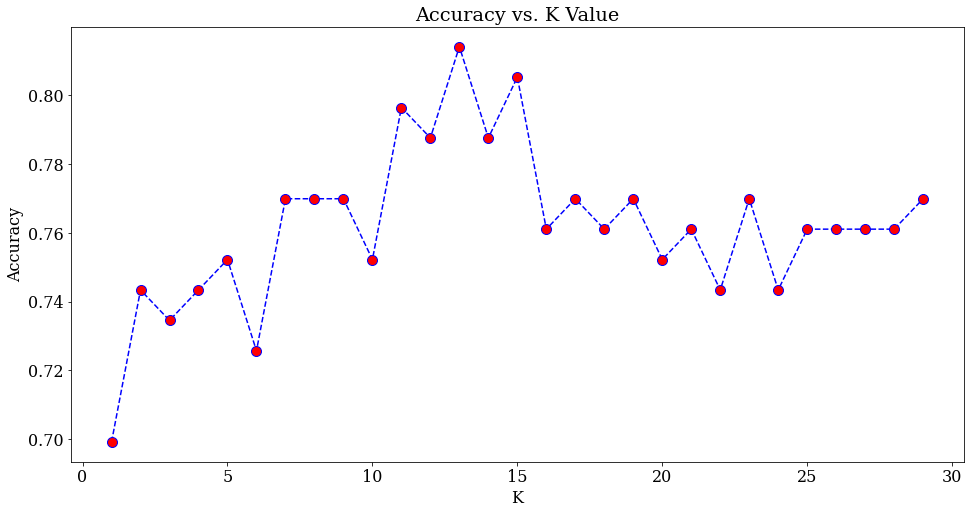

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(16,8))
plt.plot(range(1,30),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 16})

plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",1+acc.index(max(acc)))

## Find optimal value for K using AUC

Maximum AUC:- 0.8435897435897436 at K = 9


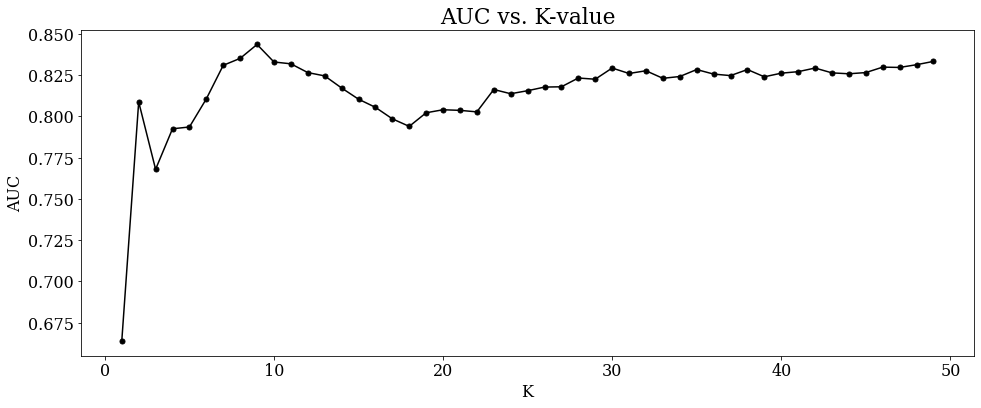

In [ ]:
auc_scores = []
# Will take some time
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    # Calculate probabilities and determine TPR and FPR
    probs = neigh.predict_proba(x_test)
    # Reading probability of second class (Silent)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    
plt.figure(figsize=(16,6))
plt.plot(range(1,50), auc_scores, color = 'black',linestyle='solid', 
         marker='.',markerfacecolor='black', markersize=10)

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 18})

plt.title('AUC vs. K-value')
plt.xlabel('K')
plt.ylabel('AUC')
print("Maximum AUC:-",max(auc_scores),"at K =",1+auc_scores.index(max(auc_scores)))

